# Data Manipulation with pandas


## 1. Get Started
Below is a code cell. It is used to execute Python code. The code below imports three packages you used in Data Manipulation with pandas: pandas, NumPy, and Matplotlib. The code also imports data you used in the course as DataFrames using the pandas [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function.


In [18]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocado = pd.read_csv("datasets/avocado.csv")
homelessness = pd.read_csv("datasets/homelessness.csv")
temperatures = pd.read_csv("datasets/temperatures.csv")
walmart = pd.read_csv("datasets/walmart.csv")

## 2. Write Code
After running the cell above, you have created four pandas DataFrames: `avocado`, `homelessness`, `temperatures`, and `walmart`. 

**Add code** to the code cells below to try one (or more) of the following challenges:

1. Print the highest weekly sales for each `department` in the `walmart` DataFrame. Limit your results to the top five departments, in descending order. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=1).
2. What was the total `nb_sold` of organic avocados in 2017 in the `avocado` DataFrame? If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing-dataframes?ex=6).
3. Create a bar plot of the total number of homeless people by region in the `homelessness` DataFrame. Order the bars in descending order. Bonus: create a horizontal bar chart. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).
4. Create a line plot with two lines representing the temperatures in Toronto and Rome. Make sure to properly label your plot. Bonus: add a legend for the two lines. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).

Be sure to check out the **Answer Key** at the end to see one way to solve each problem. Did you try something similar?

**Reminder: To execute the code you add to a cell, click inside the cell to select it and click "Run" or the ► icon. You can also use Shift-Enter to run a selected cell.**

In [9]:
import pandas as pd
walmart = pd.read_csv("datasets/walmart.csv")
print(walmart.head())

   store type  department        date  weekly_sales  is_holiday  \
0      1    A           1  2010-02-05      24924.50       False   
1      1    A           1  2010-03-05      21827.90       False   
2      1    A           1  2010-04-02      57258.43       False   
3      1    A           1  2010-05-07      17413.94       False   
4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  


In [30]:
# 1. Print the highest weekly sales for each department
department_sales = walmart.groupby("department")[["weekly_sales"]].max()
department_sales_sort = department_sales.sort_values(by="weekly_sales",ascending=False)
department_sales_sort.head()


,weekly_sales
department,
92,293966.05
72,232558.51
95,213042.66
90,166263.81
91,162497.78


In [6]:
import pandas as pd
avocado = pd.read_csv("datasets/avocado.csv")
avocado.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [33]:
# 2. What was the total `nb_sold` of organic avocados in 2017?
avo_2017 = avocado.set_index('date').sort_index().loc["2017":"2018"]
avo_org_2017 = avo_2017.loc[(avo_2017["type"]== "organic")]
avo_org_2017["nb_sold"].sum()

23321281.07

In [37]:
import pandas as pd
homelessness = pd.read_csv("datasets/homelessness.csv")
homelessness.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


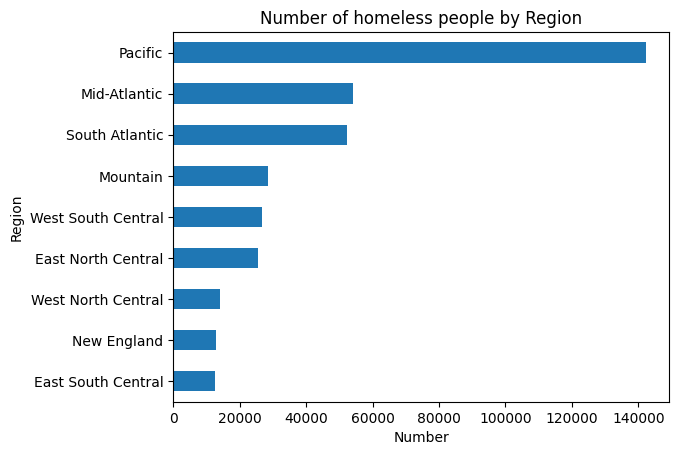

In [47]:
# 3. Create a bar plot of the number of homeless people by region
import matplotlib.pyplot as plt
homeless_region = (homelessness.groupby("region")["individuals"].sum().sort_values())
homeless_region.plot(kind= "barh")
plt.title("Number of homeless people by Region")
plt.xlabel("Number")
plt.ylabel("Region")
plt.show()


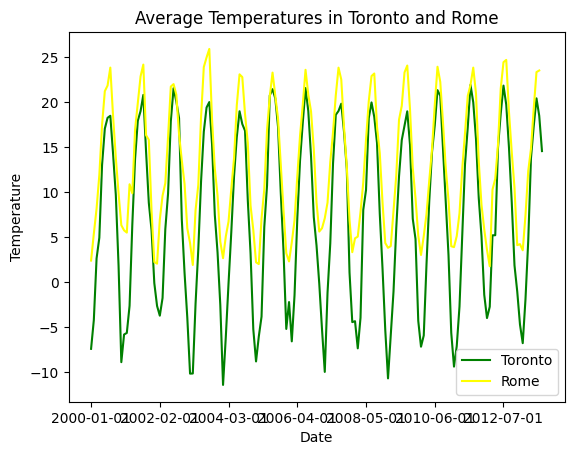

In [55]:
# 4. Create a line plot of temperatures in Toronto and Rome
import pandas as pd
import matplotlib.pyplot as plt
temperatures = pd.read_csv("datasets/temperatures.csv")
toronto = temperatures[temperatures.city == "Toronto"]
rome = temperatures[temperatures.city == "Rome"]
toronto.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="green")
rome.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="yellow")
plt.title("Average Temperatures in Toronto and Rome")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend(labels=["Toronto", "Rome"])
plt.show()

## 3. Next Steps
Feeling confident about your skills? Continue on to [Joining Data with pandas](https://app.datacamp.com/learn/courses/joining-data-with-pandas)! This course will teach you how to combine multiple datasets, an essential skill on the road to becoming a data scientist!

## 4. Answer Key
Below are potential solutions to the challenges shown above. Try them out and see how they compare to how you approached the problem!

In [27]:
# 1. Print the highest weekly sales for each department
department_sales = walmart.groupby("department")[["weekly_sales"]].max()
best_departments = department_sales.sort_values(by="weekly_sales", ascending=False)
best_departments.head()

,weekly_sales
department,
92,293966.05
72,232558.51
95,213042.66
90,166263.81
91,162497.78


In [7]:
# 2. What was the total `nb_sold` of organic avocados in 2017?
avocado_2017 = avocado.set_index("date").sort_index().loc["2017":"2018"]
avocado_organic_2017 = avocado_2017.loc[(avocado_2017["type"] == "organic")]
avocado_organic_2017["nb_sold"].sum()

23321281.07

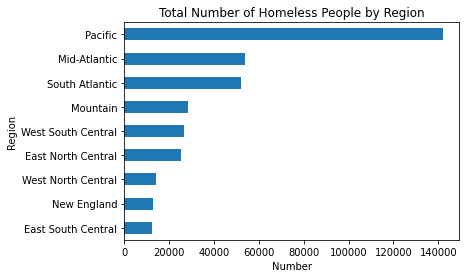

In [8]:
# 3. Create a bar plot of the number of homeless people by region
homelessness_by_region = (
    homelessness.groupby("region")["individuals"].sum().sort_values()
)
homelessness_by_region.plot(kind="barh")
plt.title("Total Number of Homeless People by Region")
plt.xlabel("Number")
plt.ylabel("Region")
plt.show()

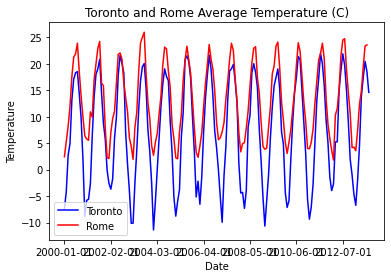

In [9]:
# 4. Create a line plot of temperatures in Toronto and Rome
toronto = temperatures[temperatures.city == "Toronto"]
rome = temperatures[temperatures.city == "Rome"]
toronto.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="blue")
rome.groupby("date")["avg_temp_c"].mean().plot(kind="line", color="red")
plt.title("Toronto and Rome Average Temperature (C)")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend(labels=["Toronto", "Rome"])
plt.show()